In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
from IPython.display import display
import neurokit2 as nk
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle

# Set matplotlib parameters for displaying graphs
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = [10, 5]  # Bigger images
plt.rcParams['font.size']= 14

pd.set_option('display.max_columns', None)

p = 'data/part206/part206_pilot_ecg_signals.p'
ecg = pickle.load(open(p,"rb"))
eda = pickle.load(open('data/part206/part206_pilot_eda_signals.p',"rb"))
rsp = pickle.load(open('data/part206/part206_pilot_rsp_signals.p',"rb"))
baseline_fn = 'data/part206/part206_baseline_ecg_signals.p'
baseline2_fn = 'data/part206/part206_baseline_eda_signals.p'
baseline3_fn = 'data/part206/part206_baseline_rsp_signals.p'
ecg_baseline = pickle.load(open(baseline_fn,"rb"))
eda_baseline = pickle.load(open(baseline2_fn,"rb"))
rsp_baseline = pickle.load(open(baseline3_fn,"rb"))

In [2]:
data_file = 'data/part206/part206_pilot.acq'
rate = 2000

data, sampling_rate = nk.read_acqknowledge(data_file)
data = data.rename(columns={"RSP, X, RSPEC-R": "RSP", "DTU100 - Trigger View, AMI / HLT - A11": "TRIG",
                            "EDA, X, PPGED-R": "EDA", "ECG, X, RSPEC-R": "ECG"})
start_times = [317250, 1023250, 1567250, 2101250, 2659250, 3307250, 3843250, 4377250, 4913250, 5451250, 5939250, 6503250]
feedback_times = [950589, 1495874, 2029686, 2580921, 3103039, 3767436, 4295163, 4844705, 5378331, 5858753, 6393158, 6956801]
taskload_settings = [3.0, 3.0, 2.0 ,3.0 ,2.0, 4.0 ,2.0 ,4.0,4.0,2.0,4.0,3.0]
trust_settings = [1,1,1,1,0,1,0,1,1,1,1,0]
elapsed_time_lockin=[6.30000000000000, 5.06666666666666, 7.93333333333333, 5, 8.63333333333333, 6.40000000000000, 9.10000000000000, 6.33333333333334, 6.80000000000000,5.66666666666666,5.26666666666667,7.36666666666667]

durations = [100,100,100,100,100,100,100,100,100,100,100,100]
#durations = [633339, 472624, 462436, 479671, 443789, 460186, 451913, 467455, 465081, 407503, 453908, 453551]

In [3]:
events = {}
events['onset'] = start_times
events['duration'] = durations
events['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events['condition'] =  taskload_settings
#events['trust'] = trust_settings DOES NOT WORK!

events_feedback = {}
events_feedback['onset'] = feedback_times
events_feedback['duration'] = durations
events_feedback['label']=  [1,2,3,4,5,6,7,8,9,10,11,12]
events_feedback['condition'] =  taskload_settings

In [4]:
ecg_pilot_interval = nk.epochs_create(ecg, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
eda_pilot_interval = nk.epochs_create(eda, events, sampling_rate=rate, epochs_start=0, epochs_end=50)
rsp_pilot_interval = nk.epochs_create(rsp, events, sampling_rate=rate, epochs_start=0, epochs_end=50)

ecg_trust_interval = nk.epochs_create(ecg,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
eda_trust_interval = nk.epochs_create(eda,events,sampling_rate=rate,epochs_start=50,epochs_end=70)
rsp_trust_interval = nk.epochs_create(rsp,events,sampling_rate=rate,epochs_start=50,epochs_end=70)

ecg_trust_event = nk.epochs_create(ecg,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
eda_trust_event = nk.epochs_create(eda,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)
rsp_trust_event = nk.epochs_create(rsp,events_feedback,sampling_rate=rate,epochs_start=-5,epochs_end=10)


In [5]:
pi_high_tl = {}
hc=1
pi_med_tl = {}
mc=1
pi_low_tl = {}
lc=1
for i in range(1,13):
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = ecg_pilot_interval[i]
        hc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = ecg_pilot_interval[i]
        mc+=1
    if (ecg_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = ecg_pilot_interval[i]
        lc+=1

for i in range(1,13):
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = eda_pilot_interval[i]
        hc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = eda_pilot_interval[i]
        mc+=1
    if (eda_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = eda_pilot_interval[i]
        lc+=1
            
for i in range(1,13):
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 4.0):
        pi_high_tl[hc] = rsp_pilot_interval[i]
        hc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 3.0):
        pi_med_tl[mc] = rsp_pilot_interval[i]
        mc+=1
    if (rsp_pilot_interval[i]['Condition'].iloc[0] == 2.0):
        pi_low_tl[lc] = rsp_pilot_interval[i]
        lc+=1

In [6]:
#peaks, info = nk.ecg_peaks(ecg, sampling_rate=rate)
#hrv_freq = nk.hrv_frequency(peaks, sampling_rate=2000, show=True)
#plot = nk.events_plot(events, eda['EDA_Clean'])

In [7]:
pi_eda_features = (nk.eda_analyze(eda_pilot_interval, sampling_rate=rate))
baseline_eda_features = (nk.eda_analyze(eda_baseline,sampling_rate=rate))

C:\Users\BIOPACMan\Anaconda3\lib\site-packages\neurokit2\eda\eda_intervalrelated.py:116: RuntimeWarning: invalid value encountered in double_scalars
  output["SCR_Peaks_Amplitude_Mean"] = np.nansum(amplitude) / np.sum(peaks)


In [8]:
pi_ecg_features = (nk.ecg_analyze(ecg_pilot_interval, sampling_rate=rate))
trust_ecg_features=(nk.ecg_analyze(ecg_trust_interval, sampling_rate=rate))
baseline_ecg_features = (nk.ecg_analyze(ecg_baseline, sampling_rate=rate))

In [9]:
pi_rsp_features=(nk.rsp_analyze(rsp_pilot_interval, sampling_rate=rate))
baseline_features=(nk.rsp_analyze(rsp_baseline, sampling_rate=rate))

In [10]:
x_axis = np.linspace(0, ecg_pilot_interval[1].shape[0]/ sampling_rate, ecg_pilot_interval[1].shape[0])

In [11]:
rpeaks, info = nk.ecg_peaks(ecg_pilot_interval[1], sampling_rate=2000)

# Compute rate
ecg_rate = nk.ecg_rate(rpeaks, sampling_rate=2000, desired_length=len(ecg))
edr = nk.ecg_rsp(ecg_rate, sampling_rate=2000)

In [12]:
# plt.figure()
# plt.plot(x_axis,rsp_pilot_interval[1]['RSP_Clean'][:100000],label='RSP')
# plt.plot(x_axis,edr[:100000],label='EDR')
# plt.legend()
# plt.title("RSP vs ECG-Derived Respiration")
# plt.xlabel("Seconds")

In [13]:
# for i in range(1,5):

#     title = "Individual Heart Beats High TL Instance "+ str(i)
#     plt.title(title)
#     peaks = np.where(pi_high_tl[i]["ECG_R_Peaks"] == 1)[0]
#     heartbeats = nk.ecg_segment(pi_high_tl[i]["ECG_Clean"], peaks, 2000)
#     heartbeats = nk.epochs_to_df(heartbeats)

#     heartbeats_pivoted = heartbeats.pivot(index="Time", columns="Label", values="Signal")

#     plt.plot(heartbeats_pivoted)

#     cmap = iter(
#         plt.cm.YlOrRd(np.linspace(0, 1, num=int(heartbeats["Label"].nunique())))  # pylint: disable=E1101
#     )  # Aesthetics of heart beats

#     lines = []
#     for x, color in zip(heartbeats_pivoted, cmap):
#         (line,) = plt.plot(heartbeats_pivoted[x], color=color)
#         lines.append(line)

#     plt.savefig('data/part206/figures/'+title+'.jpg')

In [14]:
# for i in range(1,13):

#     title = "Individual Heart Beats Piloting Trial "+ str(i)
#     plt.title(title)
#     peaks = np.where(ecg_pilot_interval[int(i)]["ECG_R_Peaks"] == 1)[0]
#     heartbeats = nk.ecg_segment(ecg_pilot_interval[int(i)]["ECG_Clean"], peaks, 2000)
#     heartbeats = nk.epochs_to_df(heartbeats)

#     heartbeats_pivoted = heartbeats.pivot(index="Time", columns="Label", values="Signal")

#     plt.plot(heartbeats_pivoted)

#     cmap = iter(
#         plt.cm.YlOrRd(np.linspace(0, 1, num=int(heartbeats["Label"].nunique())))  # pylint: disable=E1101
#     )  # Aesthetics of heart beats

#     lines = []
#     for x, color in zip(heartbeats_pivoted, cmap):
#         (line,) = plt.plot(heartbeats_pivoted[x], color=color)
#         lines.append(line)

#     plt.savefig('data/part206/figures/'+title+'.jpg')
#     plt.close()

In [15]:
rmssd_3 = (pi_ecg_features["HRV_RMSSD"][6]+pi_ecg_features["HRV_RMSSD"][8]+
            pi_ecg_features["HRV_RMSSD"][9]+pi_ecg_features["HRV_RMSSD"][11])/4
rmssd_2 = (pi_ecg_features["HRV_RMSSD"][1]+pi_ecg_features["HRV_RMSSD"][2]+
            pi_ecg_features["HRV_RMSSD"][4]+pi_ecg_features["HRV_RMSSD"][12])/4
rmssd_1 = (pi_ecg_features["HRV_RMSSD"][3]+pi_ecg_features["HRV_RMSSD"][5]+
            pi_ecg_features["HRV_RMSSD"][7]+pi_ecg_features["HRV_RMSSD"][10])/4

<IPython.core.display.Javascript object>


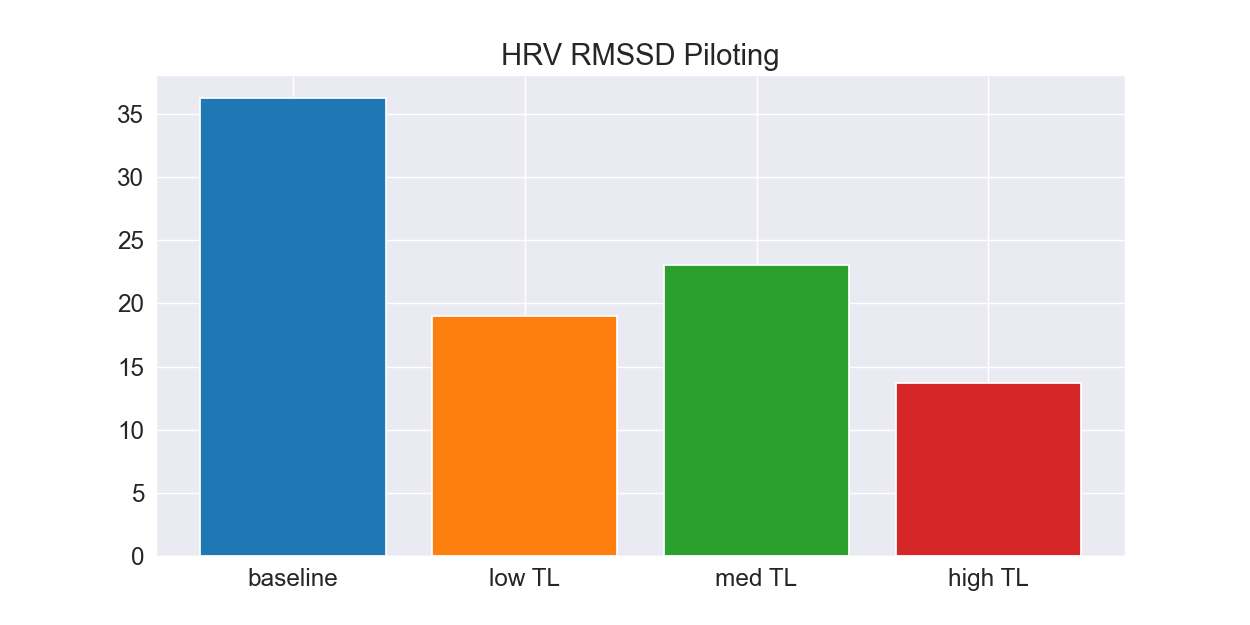

<BarContainer object of 1 artists>

In [16]:
plt.figure()
plt.title("HRV RMSSD Piloting")
plt.bar('baseline',baseline_ecg_features['HRV_RMSSD'])
plt.bar('low TL',rmssd_1)
plt.bar('med TL',rmssd_2)
plt.bar('high TL',rmssd_3)

In [17]:
pi_ecg_features


,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,HRV_IQRNN,HRV_pNN50,HRV_pNN20,HRV_TINN,HRV_HTI,HRV_ULF,HRV_VLF,HRV_LF,HRV_HF,HRV_VHF,HRV_LFHF,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD1SD2,HRV_S,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_PIP,HRV_IALS,HRV_PSS,HRV_PAS,HRV_GI,HRV_SI,HRV_AI,HRV_PI,HRV_C1d,HRV_C1a,HRV_SD1d,HRV_SD1a,HRV_C2d,HRV_C2a,HRV_SD2d,HRV_SD2a,HRV_Cd,HRV_Ca,HRV_SDNNd,HRV_SDNNa,HRV_ApEn,HRV_SampEn
1,99.020326,42.597572,608.000000,78.288728,42.800700,0.128764,0.070062,584.00,55.59750,0.095201,90.000,14.814815,46.913580,377.0,3.857143,NaN,NaN,NaN,0.019599,0.000597,NaN,NaN,0.970431,-3.932251,30.264666,106.121124,0.285190,10089.917003,3.506436,4.710858,1488.427883,0.395062,0.405063,0.625000,0.187500,54.138310,54.407590,53.880039,58.227848,0.719626,0.280374,25.713120,16.049814,0.373333,0.626667,64.841026,84.007943,0.399453,0.600547,49.323033,60.476983,0.580947,1.018570
2,103.357968,13.606284,580.482353,29.055719,13.687957,0.050054,0.023440,575.50,25.20420,0.043795,33.000,1.176471,8.235294,129.5,4.250000,NaN,NaN,NaN,0.023259,0.000417,NaN,NaN,0.982407,-3.761052,9.678847,40.186837,0.240846,1221.960921,4.152027,3.794027,667.427379,0.352941,0.365854,0.333333,0.000000,50.178571,50.184032,50.172251,48.780488,0.468057,0.531943,6.621774,7.059237,0.528467,0.471533,29.214122,27.595597,0.525155,0.474845,21.181511,20.141373,0.660192,1.182695
3,103.089558,29.496418,582.576471,50.473502,29.634261,0.086638,0.050631,569.00,37.06500,0.065141,55.000,8.235294,21.176471,242.0,2.931034,NaN,NaN,NaN,0.075013,0.003937,NaN,NaN,0.950129,-2.590089,20.954587,67.891377,0.308649,4469.342050,3.239929,4.357214,879.852989,0.482353,0.493976,0.634146,0.095238,54.294375,54.602541,53.993226,50.602410,0.571157,0.428843,15.857422,13.740550,0.497146,0.502854,47.869223,48.143292,0.503598,0.496402,35.657540,35.401831,0.563826,0.736738
4,105.787011,14.466079,567.183908,23.171895,14.550130,0.040854,0.025505,566.50,25.20420,0.044491,33.750,0.000000,17.241379,94.5,5.117647,NaN,NaN,NaN,0.135937,0.001822,NaN,NaN,0.986774,-1.995563,10.288496,31.276097,0.328957,1010.914236,3.039910,3.711684,380.306031,0.390805,0.392857,0.484848,0.043478,49.342770,49.345093,49.341341,54.761905,0.554592,0.445408,7.662360,6.866800,0.436162,0.563838,20.655533,23.484957,0.447727,0.552273,15.578235,17.301679,0.643634,1.651402
5,108.800592,13.863399,551.511111,26.694061,13.926266,0.048402,0.025137,550.25,20.38575,0.037048,24.375,1.111111,10.000000,119.0,4.736842,NaN,NaN,NaN,0.038087,0.001092,NaN,NaN,0.972135,-3.267895,9.847357,36.240042,0.271726,1121.135885,3.680180,3.756628,533.479447,0.322222,0.313953,0.407407,0.000000,53.295775,53.207508,53.382549,53.488372,0.658365,0.341635,7.999112,5.762215,0.515274,0.484726,26.014049,25.231129,0.525134,0.474866,19.244695,18.300451,0.575704,1.006442
6,102.667082,14.096590,584.345238,26.052770,14.179890,0.044585,0.024124,587.75,22.98030,0.039099,30.250,0.000000,14.285714,120.5,4.666667,NaN,NaN,NaN,0.027054,0.000483,NaN,NaN,0.982473,-3.609904,10.026696,35.564077,0.281933,1120.261158,3.546939,3.756289,504.574410,0.392857,0.395062,0.468750,0.000000,48.834688,48.859495,48.811137,53.086420,0.487033,0.512967,6.998584,7.182508,0.491912,0.508088,24.943366,25.350189,0.491552,0.508448,18.318730,18.630895,0.648236,1.658228
7,107.322338,14.340883,559.221591,27.094434,14.422518,0.048450,0.025644,552.25,22.23900,0.040270,34.875,1.136364,17.045455,125.5,3.142857,NaN,NaN,NaN,0.036075,0.000526,NaN,NaN,0.985623,-3.322150,10.198260,37.138431,0.274601,1189.869997,3.641644,3.782470,540.979751,0.352273,0.360465,0.354839,0.040000,51.015801,51.047767,50.981638,52.325581,0.462009,0.537991,6.932607,7.480984,0.571499,0.428501,28.075750,24.310806,0.563820,0.436180,20.448824,17.985834,0.550144,0.815037
8,100.376231,12.297878,597.789157,21.264467,12.364301,0.035572,0.020572,596.00,17.04990,0.028607,23.250,0.000000,9.638554,109.0,3.952381,NaN,NaN,NaN,0.059775,0.001779,NaN,NaN,0.971092,-2.817167,8.742881,28.142051,0.310670,772.9

<IPython.core.display.Javascript object>


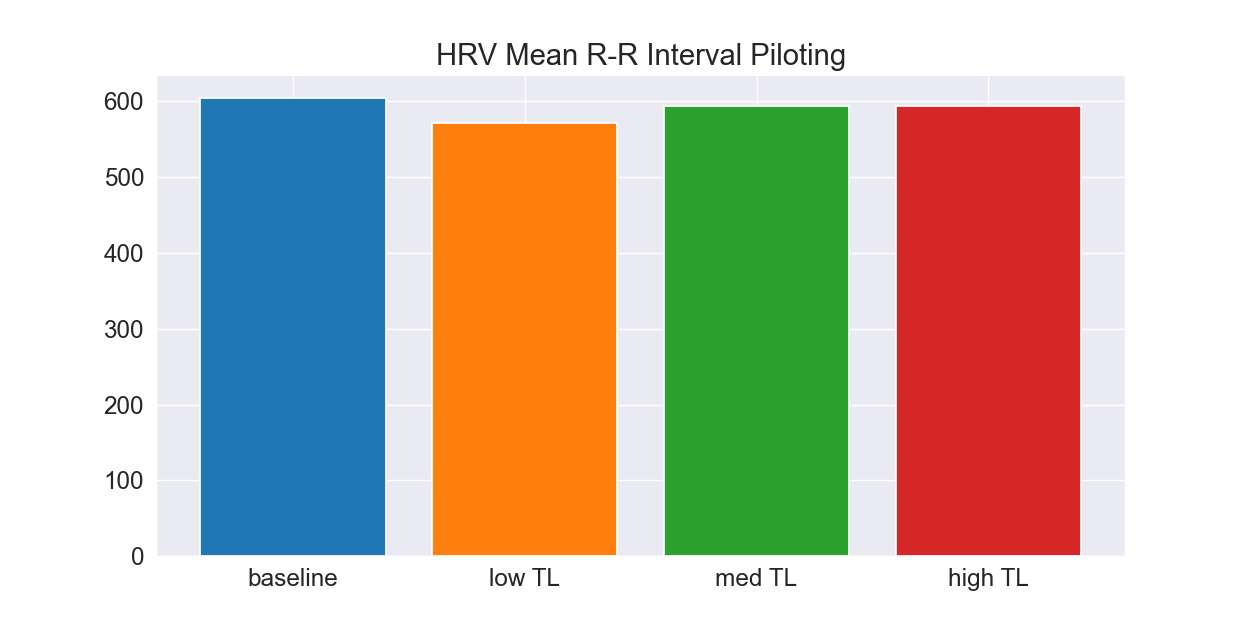

<BarContainer object of 1 artists>

In [18]:
nn3 = (pi_ecg_features["HRV_MeanNN"][6]+pi_ecg_features["HRV_MeanNN"][8]+
            pi_ecg_features["HRV_MeanNN"][9]+pi_ecg_features["HRV_MeanNN"][11])/4
nn2 = (pi_ecg_features["HRV_MeanNN"][1]+pi_ecg_features["HRV_MeanNN"][2]+
            pi_ecg_features["HRV_MeanNN"][4]+pi_ecg_features["HRV_MeanNN"][12])/4
nn1 = (pi_ecg_features["HRV_MeanNN"][3]+pi_ecg_features["HRV_MeanNN"][5]+
            pi_ecg_features["HRV_MeanNN"][7]+pi_ecg_features["HRV_MeanNN"][10])/4

plt.figure()
plt.title("HRV Mean R-R Interval Piloting")
plt.bar('baseline',baseline_ecg_features['HRV_MeanNN'])
plt.bar('low TL',nn1)
plt.bar('med TL',nn2)
plt.bar('high TL',nn3)

In [ ]:
for i in range(1,13):
    try:
        plt.figure()
        title = "EDA Trial "+ str(i)
        plt.plot(x_axis,rsp_pilot_interval[i][])
        fig.savefig('data/part206/figures/'+title+'.jpg')
    except:
        print(str(i)+" did not work")
    #plt.savefig('data/part206/figures/'+title+'.jpg')
    #plt.close()

<IPython.core.display.Javascript object>


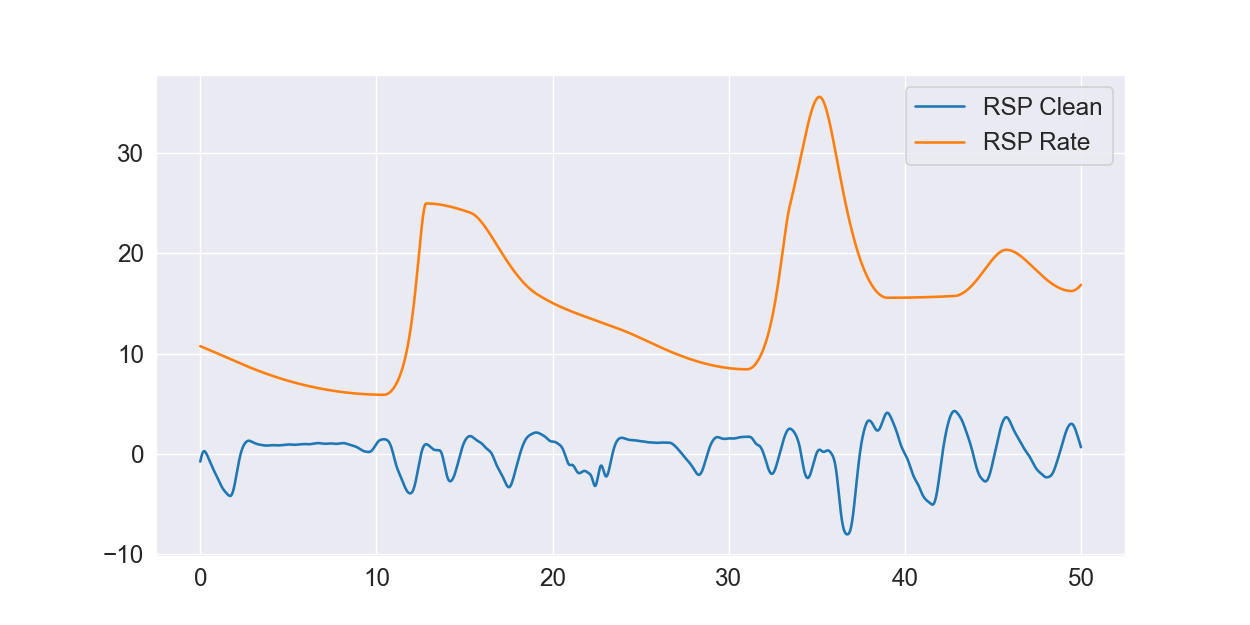

In [29]:
plt.figure()
plt.plot(x_axis,rsp_pilot_interval[1]['RSP_Clean'],x_axis,rsp_pilot_interval[1]['RSP_Rate'])
plt.legend(['RSP Clean', 'RSP Rate'])